In [15]:
import pandas as pd
import plotly.express as px

# Load your dataset
file_path = '../data/processed/Housing_Price_Index_1981_2024.csv'
housing_data = pd.read_csv(file_path)

# Convert 'Month-Year' to datetime and set it as index
housing_data['Month-Year'] = pd.to_datetime(housing_data['Month-Year'], format='%Y-%m')
housing_data.set_index('Month-Year', inplace=True)

# Select the latest available month
latest_data = housing_data.iloc[-1].dropna()

# Prepare the data for the map
map_data = latest_data.reset_index()
map_data.columns = ['Location', 'Price_Index']

# Filter out locations that are not cities (e.g., remove province-wide or region-wide entries)
cities_to_include = map_data['Location'].str.contains(',')
map_data_cities = map_data[cities_to_include]

# Clean up the city names by removing the province information after the comma
map_data_cities['City'] = map_data_cities['Location'].str.split(',').str[0].str.strip()

# Define latitude and longitude for the cities
city_coordinates = {
    "Calgary": [51.0447, -114.0719],
    "Charlottetown": [46.2382, -63.1311],
    "Edmonton": [53.5461, -113.4938],
    "Gatineau": [45.4765, -75.7013],
    "Greater Sudbury": [46.4917, -80.9930],
    "Guelph": [43.5448, -80.2482],
    "Halifax": [44.6488, -63.5752],
    "Hamilton": [43.2557, -79.8711],
    "Kelowna": [49.8880, -119.4960],
    "Kitchener": [43.4516, -80.4925],
    "London": [42.9849, -81.2453],
    "Montréal": [45.5017, -73.5673],
    "Oshawa": [43.8971, -78.8658],
    "Ottawa": [45.4215, -75.6972],
    "Québec": [46.8139, -71.2082],
    "Regina": [50.4452, -104.6189],
    "Saint John": [45.2733, -66.0633],
    "Saskatoon": [52.1579, -106.6702],
    "Sherbrooke": [45.4042, -71.8929],
    "St. Catharines": [43.1594, -79.2469],
    "St. John's": [47.5615, -52.7126],
    "Toronto": [43.6511, -79.3835],
    "Trois-Rivières": [46.3434, -72.5400],
    "Vancouver": [49.2827, -123.1207],
    "Victoria": [48.4284, -123.3656],
    "Windsor": [42.3149, -83.0364],
    "Winnipeg": [49.8951, -97.1384]
}

# Map city names to their coordinates
map_data_cities['Latitude'] = map_data_cities['City'].map(lambda x: city_coordinates.get(x, [None, None])[0])
map_data_cities['Longitude'] = map_data_cities['City'].map(lambda x: city_coordinates.get(x, [None, None])[1])

# Filter out any rows where coordinates were not found
map_data_cities_filtered = map_data_cities.dropna(subset=['Latitude', 'Longitude'])

# Plotting the scattergeo map using Plotly
fig = px.scatter_geo(map_data_cities_filtered,
                     lat='Latitude',
                     lon='Longitude',
                     #text='City',
                     size='Price_Index',
                     color='Price_Index',
                     color_continuous_scale="YlOrRd",
                     scope="north america",
                     title="Housing Price Index by City in Canada",
                     hover_name="City")

# Ensure the map is correctly focused on Canada
fig.update_geos(
    visible=True,
    resolution=50,
    showcountries=True,
    countrycolor="RebeccaPurple",
    showland=True,
    landcolor="LightGrey",
    showocean=True,
    oceancolor="LightBlue",
    projection_type="mercator",
    center={"lat": 56.1304, "lon": -106.3468},  # Centered on Canada
    fitbounds="locations"
)

# Adjusting the layout to make the map larger
fig.update_layout(
    width=1200,   # Set the width of the map
    height=1000,   # Set the height of the map
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()

C:\Users\dimam\AppData\Local\Temp\ipykernel_29984\2311281757.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dimam\AppData\Local\Temp\ipykernel_29984\2311281757.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dimam\AppData\Local\Temp\ipykernel_29984\2311281757.py:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [20]:
import pandas as pd
import plotly.express as px

# Load your dataset
file_path = '../data/processed/Housing_Price_Index_1981_2024.csv'  # Replace with the actual file path
housing_data = pd.read_csv(file_path)

# Convert 'Month-Year' to datetime and set it as index
housing_data['Month-Year'] = pd.to_datetime(housing_data['Month-Year'], format='%Y-%m')
housing_data.set_index('Month-Year', inplace=True)

# Select the latest available month
latest_data = housing_data.iloc[-1].dropna()

# Prepare the data for the map
map_data = latest_data.reset_index()
map_data.columns = ['Location', 'Price_Index']

# Filter out locations that are not cities (e.g., remove province-wide or region-wide entries)
cities_to_include = map_data['Location'].str.contains(',')
map_data_cities = map_data[cities_to_include]

# Clean up the city names by removing the province information after the comma
map_data_cities['City'] = map_data_cities['Location'].str.split(',').str[0].str.strip()

# Define latitude and longitude for the cities
city_coordinates = {
    "Calgary": [51.0447, -114.0719],
    "Charlottetown": [46.2382, -63.1311],
    "Edmonton": [53.5461, -113.4938],
    "Gatineau": [45.4765, -75.7013],
    "Greater Sudbury": [46.4917, -80.9930],
    "Guelph": [43.5448, -80.2482],
    "Halifax": [44.6488, -63.5752],
    "Hamilton": [43.2557, -79.8711],
    "Kelowna": [49.8880, -119.4960],
    "Kitchener": [43.4516, -80.4925],
    "London": [42.9849, -81.2453],
    "Montréal": [45.5017, -73.5673],
    "Oshawa": [43.8971, -78.8658],
    "Ottawa": [45.4215, -75.6972],
    "Québec": [46.8139, -71.2082],
    "Regina": [50.4452, -104.6189],
    "Saint John": [45.2733, -66.0633],
    "Saskatoon": [52.1579, -106.6702],
    "Sherbrooke": [45.4042, -71.8929],
    "St. Catharines": [43.1594, -79.2469],
    "St. John's": [47.5615, -52.7126],
    "Toronto": [43.6511, -79.3835],
    "Trois-Rivières": [46.3434, -72.5400],
    "Vancouver": [49.2827, -123.1207],
    "Victoria": [48.4284, -123.3656],
    "Windsor": [42.3149, -83.0364],
    "Winnipeg": [49.8951, -97.1384]
}

# Map city names to their coordinates
map_data_cities['Latitude'] = map_data_cities['City'].map(lambda x: city_coordinates.get(x, [None, None])[0])
map_data_cities['Longitude'] = map_data_cities['City'].map(lambda x: city_coordinates.get(x, [None, None])[1])

# Filter out any rows where coordinates were not found
map_data_cities_filtered = map_data_cities.dropna(subset=['Latitude', 'Longitude'])

# Plotting the geographical bubble map using Plotly
fig = px.scatter_geo(map_data_cities_filtered,
                     lat='Latitude',
                     lon='Longitude',
                     #text='City',
                     size='Price_Index',
                     color='Price_Index',
                     color_continuous_scale="YlOrRd",
                     scope="north america",
                     title="Housing Price Index by City in Canada",
                     hover_name="City",
                     size_max=50)  # Adjust the maximum size of the bubbles

# Ensure the map is correctly focused on Canada
fig.update_geos(
    visible=True,
    resolution=50,
    showcountries=True,
    countrycolor="RebeccaPurple",
    showland=True,
    landcolor="LightGrey",
    showocean=True,
    oceancolor="LightBlue",
    projection_type="mercator",
    center={"lat": 56.1304, "lon": -106.3468},  # Centered on Canada
    fitbounds="locations"
)

# Adjusting the layout to make the map larger
fig.update_layout(
    width=1200,   # Set the width of the map
    height=1200,   # Set the height of the map
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()


C:\Users\dimam\AppData\Local\Temp\ipykernel_29984\4026408357.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dimam\AppData\Local\Temp\ipykernel_29984\4026408357.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dimam\AppData\Local\Temp\ipykernel_29984\4026408357.py:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

C:\Users\dimam\AppData\Local\Temp\ipykernel_29984\1960269512.py:15: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



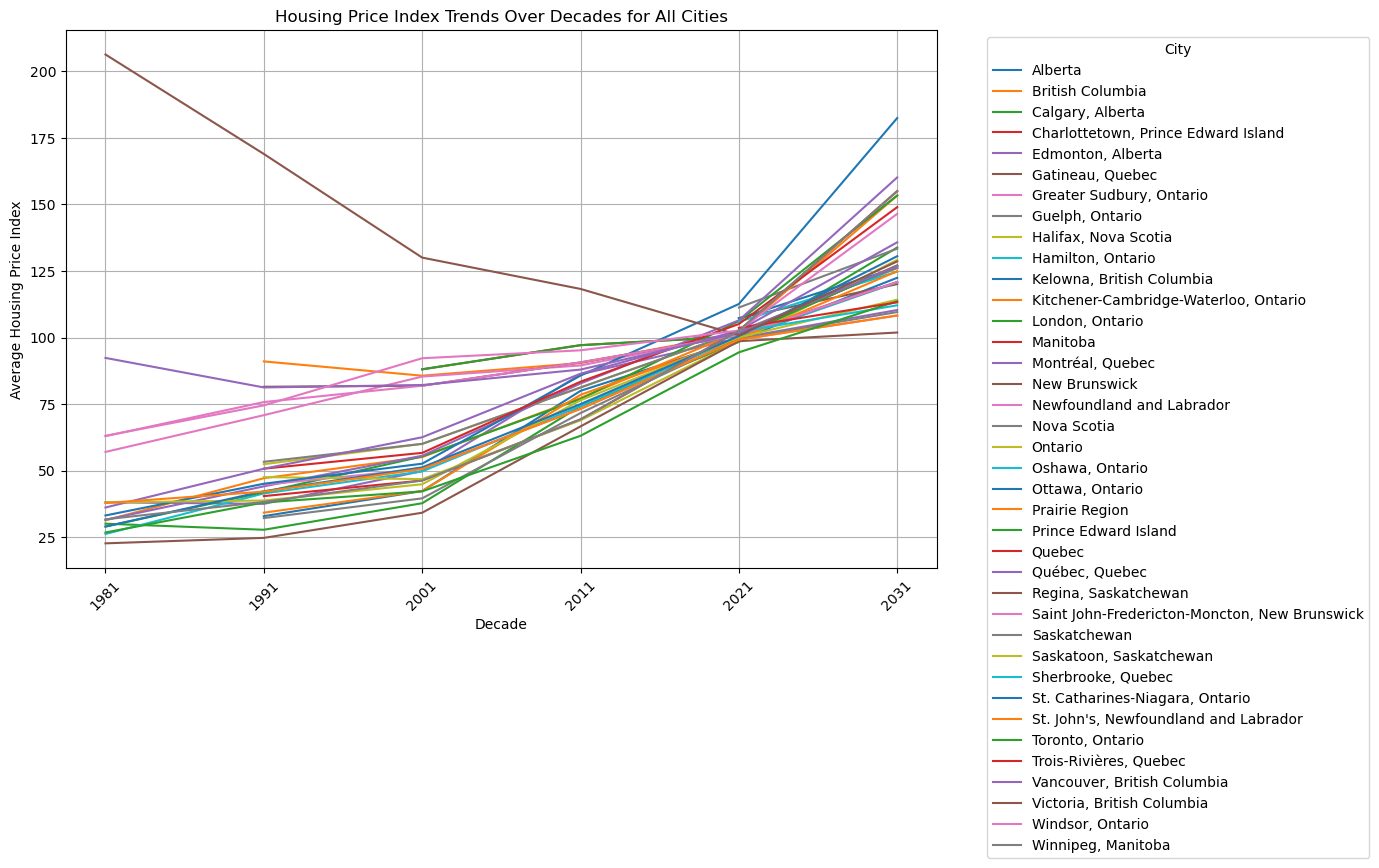

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = '../data/processed/Housing_Price_Index_1981_2024.csv'  # Replace with the actual file path
housing_data = pd.read_csv(file_path)

# Convert 'Month-Year' to datetime
housing_data['Month-Year'] = pd.to_datetime(housing_data['Month-Year'], format='%Y-%m')

# Set 'Month-Year' as index
housing_data.set_index('Month-Year', inplace=True)

# Resample the data to get the average housing price index for each decade
housing_data_decade = housing_data.resample('10A').mean()  # '10A' groups the data by decades

# Drop the "Canada" aggregate column if present
housing_data_decade = housing_data_decade.drop(columns=['Canada'], errors='ignore')

# Plotting the trends over decades for all cities
plt.figure(figsize=(14, 8))

for location in housing_data_decade.columns:
    plt.plot(housing_data_decade.index.year, housing_data_decade[location], label=location)

plt.title('Housing Price Index Trends Over Decades for All Cities')
plt.xlabel('Decade')
plt.ylabel('Average Housing Price Index')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(housing_data_decade.index.year, rotation=45)
plt.tight_layout()

plt.show()


C:\Users\dimam\AppData\Local\Temp\ipykernel_29984\1392992905.py:15: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



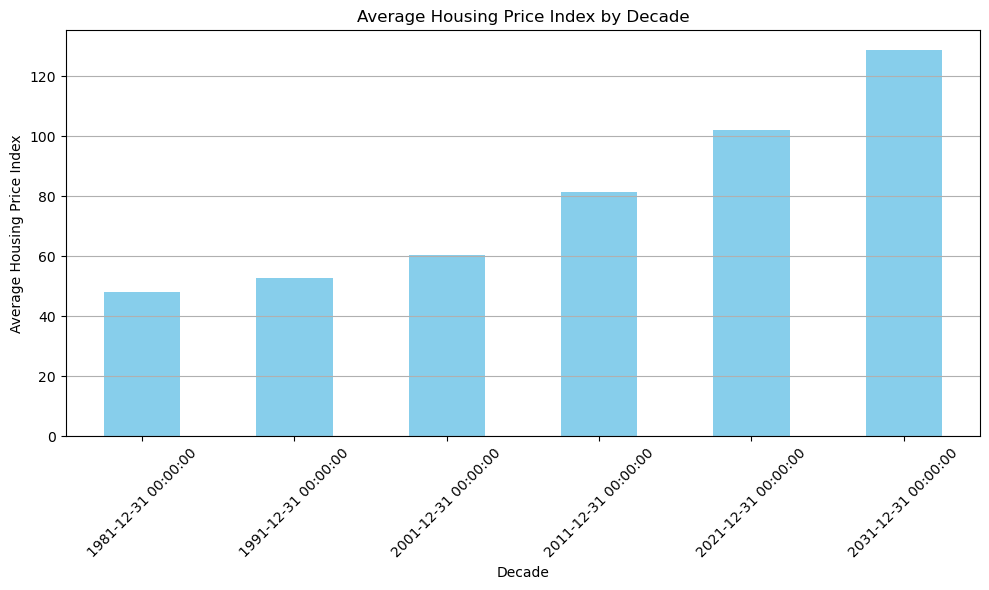

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = '../data/processed/Housing_Price_Index_1981_2024.csv'  # Replace with the actual file path
housing_data = pd.read_csv(file_path)

# Convert 'Month-Year' to datetime
housing_data['Month-Year'] = pd.to_datetime(housing_data['Month-Year'], format='%Y-%m')

# Set 'Month-Year' as index
housing_data.set_index('Month-Year', inplace=True)

# Resample the data to get the average housing price index for each decade
housing_data_decade = housing_data.resample('10A').mean()  # '10A' groups the data by decades

# Calculate the average price index for each decade
average_price_by_decade = housing_data_decade.mean(axis=1)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
average_price_by_decade.plot(kind='bar', color='skyblue')

plt.title('Average Housing Price Index by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Housing Price Index')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


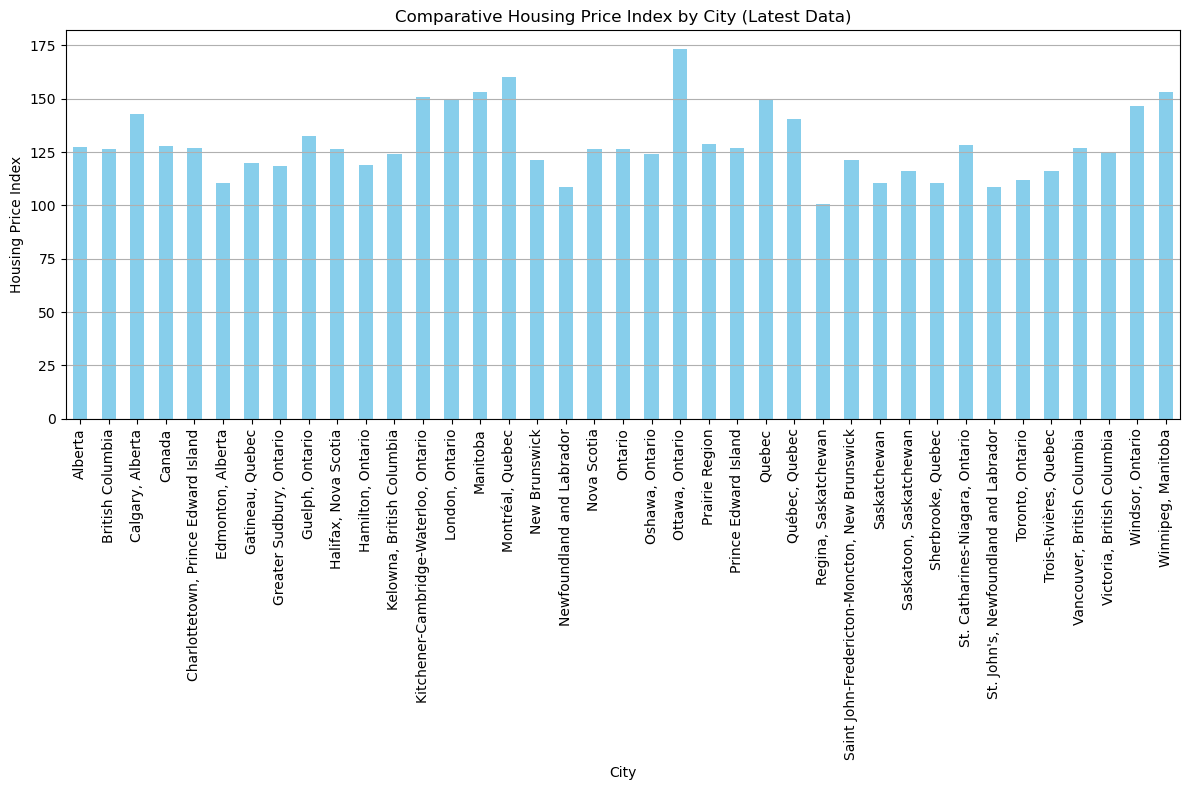

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = '../data/processed/Housing_Price_Index_1981_2024.csv'  # Replace with the actual file path
housing_data = pd.read_csv(file_path)

# Convert 'Month-Year' to datetime
housing_data['Month-Year'] = pd.to_datetime(housing_data['Month-Year'], format='%Y-%m')

# Set 'Month-Year' as index
housing_data.set_index('Month-Year', inplace=True)

# Choose a specific time point or average over a period (e.g., the latest available month)
# To use the most recent data, use the last row:
latest_data = housing_data.iloc[-1]

# Plotting the comparative bar chart
plt.figure(figsize=(12, 8))
latest_data.plot(kind='bar', color='skyblue')

plt.title('Comparative Housing Price Index by City (Latest Data)')
plt.xlabel('City')
plt.ylabel('Housing Price Index')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


C:\Users\dimam\AppData\Local\Temp\ipykernel_28432\1381146719.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  housing_data_decade = housing_data.groupby('Decade').mean()


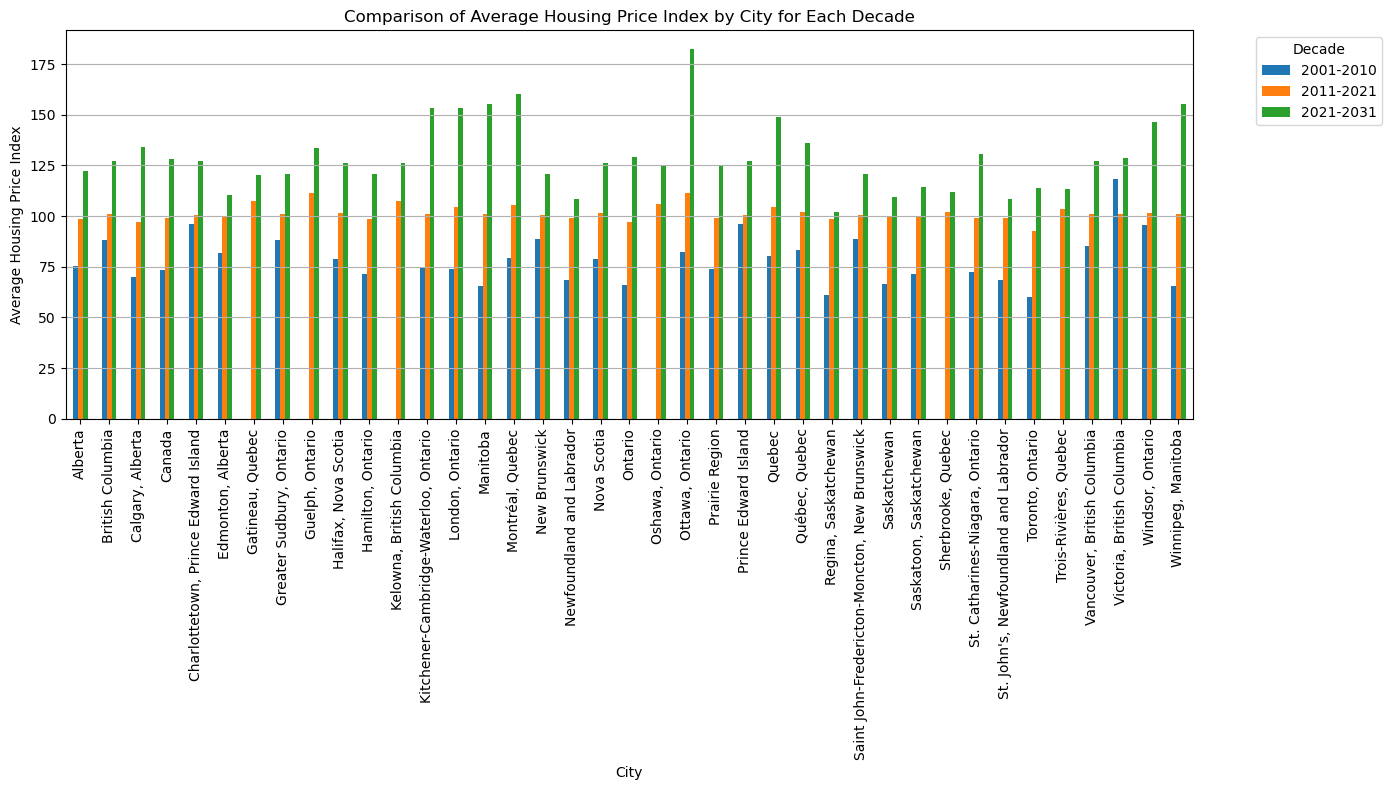

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = '../data/processed/Housing_Price_Index_1981_2024.csv'  # Replace with the actual file path
housing_data = pd.read_csv(file_path)

# Convert 'Month-Year' to datetime
housing_data['Month-Year'] = pd.to_datetime(housing_data['Month-Year'], format='%Y-%m')

# Set 'Month-Year' as index
housing_data.set_index('Month-Year', inplace=True)

# Resample the data to get the average housing price index for each decade
# Manually define the decade periods
housing_data['Decade'] = pd.cut(housing_data.index.year, 
                                bins=[2000, 2010, 2021, 2031], 
                                labels=['2001-2010', '2011-2021', '2021-2031'])

# Group by the Decade column and calculate the mean for each city
housing_data_decade = housing_data.groupby('Decade').mean()

# Plotting the average price index for each city by decade
fig, ax = plt.subplots(figsize=(14, 8))

# Creating a bar chart for each decade
housing_data_decade.T.plot(kind='bar', ax=ax)

plt.title('Comparison of Average Housing Price Index by City for Each Decade')
plt.xlabel('City')
plt.ylabel('Average Housing Price Index')
plt.xticks(rotation=90)
plt.legend(title='Decade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

plt.tight_layout()
plt.show()
